# Performing GMM
Now that we have our dataset, we can now perform GMM to cluster stocks based on the technical indicators.

In [47]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [48]:
import sys

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


We will first perform GMM on each stock individually based on its technical indicators, with the covariance type as full

C:\Users\austi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\austi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\austi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


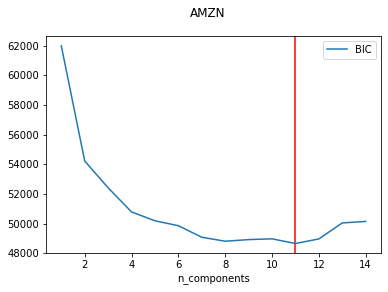

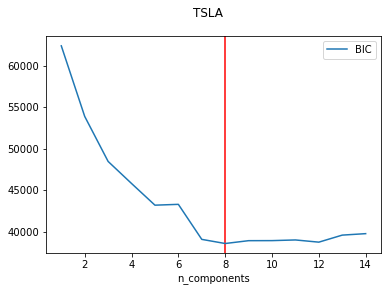

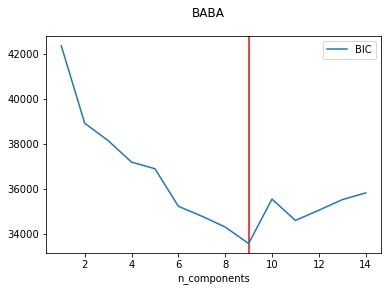

{'AMZN': array([[ 4.84219059e+01,  4.80076411e+01,  2.00543319e-02,
        -5.38648908e+05,  1.87572926e+00,  1.00653636e+00,
         1.00761966e+00,  9.83142629e-01,  1.01670625e-01,
        -6.15856916e+01,  3.98681876e-03, -1.30332450e-02,
         6.90565317e-04,  6.87084586e-02],
       [ 6.84685232e+01,  6.36738557e+01,  1.91186916e-02,
         2.45276969e+06,  1.54523277e+00,  9.89876292e-01,
         9.61669073e-01,  9.11133463e-01,  1.31092871e-01,
        -1.02128258e+01,  1.77077216e-02,  2.65039397e-02,
         6.86653715e-02,  1.84299607e-01],
       [ 5.92824840e+01,  5.32106478e+01,  1.46753795e-02,
         4.39022830e+05,  1.66398623e+00,  9.96415784e-01,
         9.88753470e-01,  8.97178314e-01,  2.35133787e-01,
        -3.50362409e+01,  1.18740364e-02,  6.95993115e-03,
         3.31798539e-02,  2.47048169e-01],
       [ 4.07899919e+01,  4.30452125e+01,  3.95058540e-02,
        -1.88535725e+06,  2.97718380e+00,  1.01218076e+00,
         1.04984092e+00,  1.00014776

In [59]:
centroids_by_stock = {}


for i in range(3):
    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    newPlot = plt.figure(i)
    newPlot.suptitle(tickers[i])
    n_components = np.arange(1, features.shape[1]+1)
    gmms = [GaussianMixture(n_components=k, covariance_type='full').fit(X) for k in n_components]
    bics = np.array([gmm.bic(X) for gmm in gmms])
    minidx = np.argmin(bics)
    centroids = gmms[minidx].means_

    

    # descale centroids
    centroids = scaler.inverse_transform(centroids)
    centroids_by_stock[tickers[i]] = centroids


    plt.axvline(x=minidx + 1, color='r')
    plt.plot(n_components, bics, label='BIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')



    #labels = gmm.predict(X)
    
    #newPlot = plt.figure(i)
    #newPlot.suptitle(tickers[i])
    #plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

plt.show()
print(centroids_by_stock)

Now we will perform GMM again but use the 'diag' covariance type

In [ ]:

for i in range(len(tickers)):
    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    gmm = GaussianMixture(n_components=2, covariance_type='diag').fit(X)
    labels = gmm.predict(X)
    
    newPlot = plt.figure(i)
    newPlot.suptitle(tickers[i])
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

plt.show()

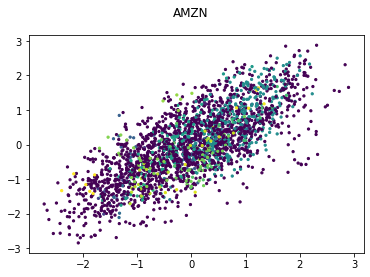

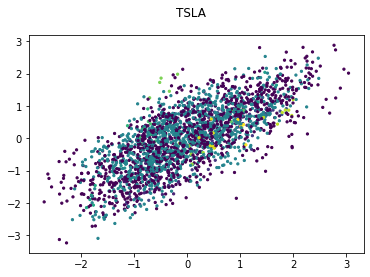

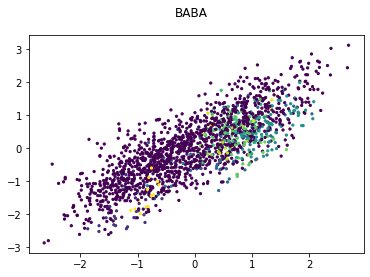

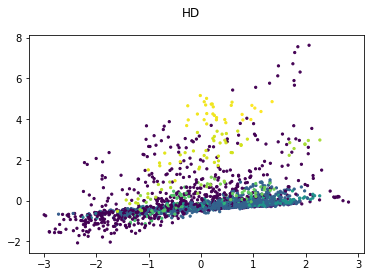

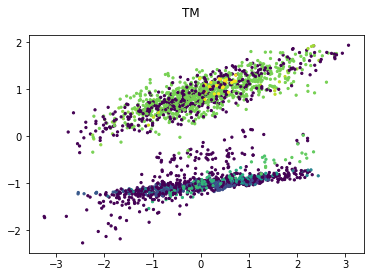

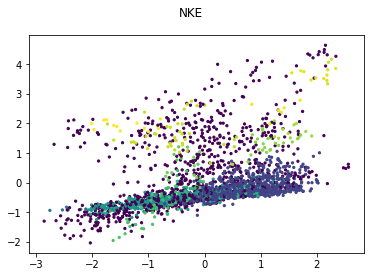

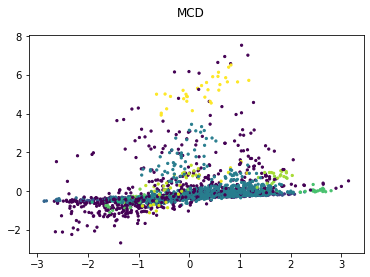

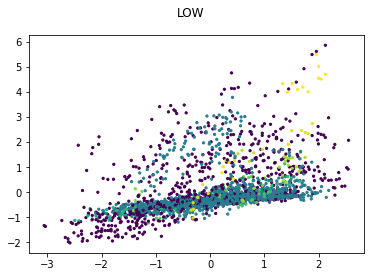

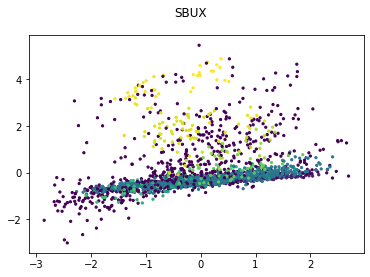

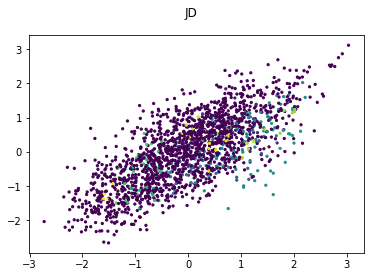

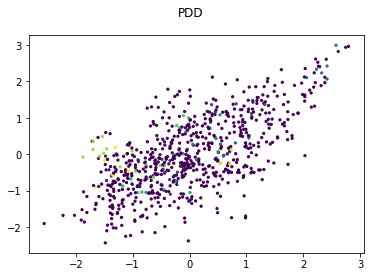

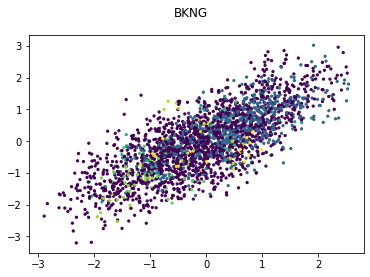

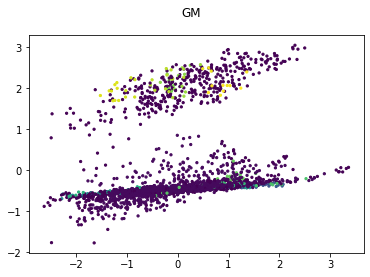

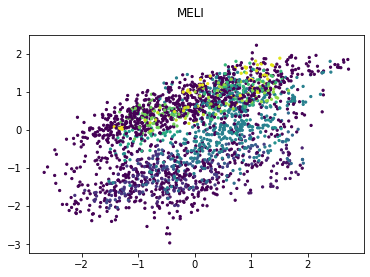

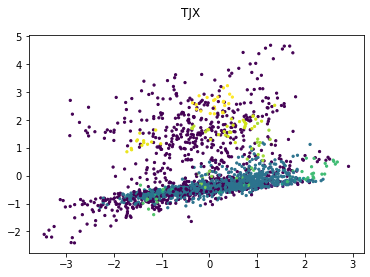

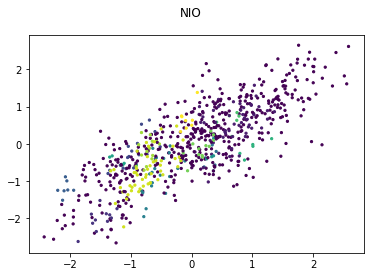

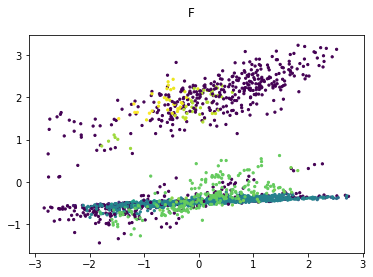

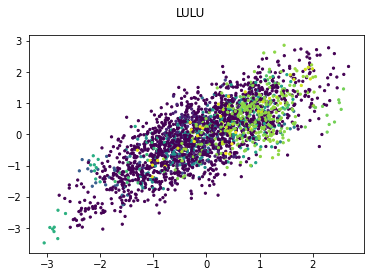

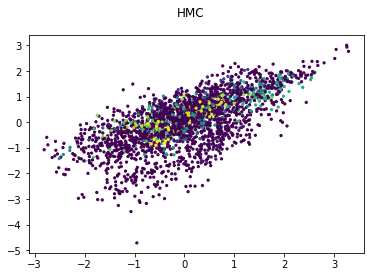

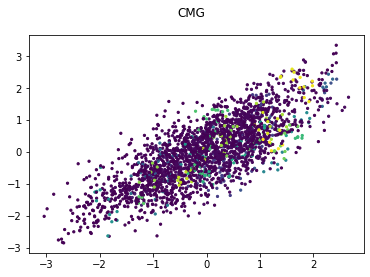

In [46]:

for i in range(len(tickers)):
    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    dbscan = DBSCAN(eps=1).fit(X)
    labels = dbscan.fit_predict(X)
    
    newPlot = plt.figure(i)
    newPlot.suptitle(tickers[i])
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

plt.show()